## Model Evaluation, and Selection in Machine Learning

The correct use of model evaluation, model selection is vital in machine learning research domain. <br> 
We will review different techniques that can be used for each of them and discuss the main advantages and disadvantages of each. 

    - Introduction
        I. Choose a propare validation strategy
        II. Evaluation Metrics
        III. Calibration
    - Implementation
        I. Regression 
        II. Classification
        III. Imbalance Learning
        IV. Hyper-parameter tunning and Model Selection


### Introduction 

### How to evaluate machine learning models and select the best one?

<figure>
    <p align="center">
        <img src="https://files.oaiusercontent.com/file-jDbzZg9gNFnEGLYbqbXKhbzZ?se=2024-01-25T19%3A56%3A58Z&sp=r&sv=2021-08-06&sr=b&rscc=max-age%3D31536000%2C%20immutable&rscd=attachment%3B%20filename%3Dc4013852-b1dc-4e20-abe1-c63ca5cdb6d7.webp&sig=OfLRMkEVrttXyZScS8JI/KXdO9V932XGeLvmzYWdrmE%3D" alt="Alt text for the image" width = "700px"/>
        <figcaption> What ...?. 
    </p>
</figure>





##### What is model evaluation?
Model evaluation is a process of assessing the model’s performance on a chosen evaluation setup. 
<br>
It is done by calculating quantitative performance metrics like F1 score or RMSE or assessing the results qualitatively by the subject matter experts. 
<br> 
The machine learning evaluation metrics you choose should reflect the business metrics you want to optimize with the machine learning solution.

##### What is model selection?
Model selection is the process of choosing the best ml model for a given task. 
<br>
It is done by comparing various model candidates on chosen evaluation metrics calculated on a designed evaluation schema. 
<br>
Choosing the correct evaluation schema, whether a simple train test split or a complex cross-validation strategy, is the crucial first step of building any machine learning solution.

## I. Choose a propare validation strategy:
Can’t stress this enough, without a reliable way to validate your model performance, no amount of hyperparameter tuning and state-of-the-art models will help you.
<img src="./evaluation.png" width="1200"/>

### 1. Random Split
Random Splits are used to randomly sample a percentage of data into training, testing, and preferably validation sets. <br>

<b>Pros</b>: <br>
    - There is a good chance that the original population is well represented in all the three sets. <br>
<b>Cons</b>:  <br>
    - The model would not generalizaed enough for unseen test dataset based on different conditions (for weather forecasting, this strategy will jumble up the seasonal pattern). 

### Time-Based Split
Splitting the data based on specific time range of temporal observation. <br>
<b>Pros</b>: <br>
    - The model is more generalizaed to unseen dataset by learning the temporal signal. <br>
<b>Cons</b>:  <br>
    - The model would not generalizaed enough for unseen test dataset based on different conditions. 
    - The strategy will jumble up the seasonal pattern. 

#### concept of window sets
Where the model is trained till a particular date and tested on the future dates iteratively such that the training window keeps ioncresing shifting by specific time scale. 

### Cross-Validation
The cross-validation technique works by randomly shuffling the dataset and then splitting it into k groups. 
<br> 
Thereafter, on iterating over each group, the group needs to be considered as a test set while all other groups are clubbed together into the training set. <br>
The model is tested on the test group and the process continues for k groups.<br>

Thus, by the end of the process, one has k different results on k different test groups. The best model can then be selected easily by choosing the one with the highest score.


<figure>
    <p align="center">
        <img src="https://www.researchgate.net/profile/Rayan-H-Assaad/publication/355889701/figure/fig1/AS:1086138706071552@1635967055039/Classical-k-fold-cross-validation-vs-time-series-split-cross-validation.ppm" alt="Alt text for the image"/>
        <figcaption>Standard K-Fold Cross Validation vs Timeseries. Figure Credit: <a href="https://www.researchgate.net/figure/Classical-k-fold-cross-validation-vs-time-series-split-cross-validation_fig1_355889701">Link</a></figcaption>
    </p>
</figure>


## II. Evaluation Metrics for Machine Learning

In this notebook, we explore various evaluation metrics used in machine learning for both classification and regression tasks. <br>
Understanding these metrics is crucial for interpreting the performance of a machine learning model and for making informed decisions on model selection and optimization.

### 1. Regression Metrics 
##### Mean Absolute Error (MAE)

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

In [1]:
def mean_absolute_error(y_true, y_pred):
    """
    Calculate the mean absolute error between the true and predicted values.

    Parameters:
    y_true (list or array): Actual true values.
    y_pred (list or array): Predicted values.

    Returns:
    float: The mean absolute error.
    """
    # Ensure that the inputs are of the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Both true and predicted values should have the same length.")

    # Calculate the absolute errors
    error = sum(abs(y_t - y_p) for y_t, y_p in zip(y_true, y_pred))

    # Return the mean absolute error
    return error / len(y_true)

##### Root Mean Square Error: 

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$


In [2]:
def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error between the true and predicted values.

    Parameters:
    y_true (list or array): Actual true values.
    y_pred (list or array): Predicted values.

    Returns:
    float: The Root Mean Squared Error.
    """
    # Ensure that the inputs are of the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Both true and predicted values should have the same length.")

    # Calculate the squared differences and mean
    squared_diffs = [(y_t - y_p) ** 2 for y_t, y_p in zip(y_true, y_pred)]
    mean_squared_diff = sum(squared_diffs) / len(y_true)

    # Return the square root of the mean squared difference
    return np.sqrt(mean_squared_diff)

##### R^2

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [3]:
def r_squared(y_true, y_pred):
    """
    Calculate the R-squared, a statistical measure of how close the data are to the fitted regression line.

    Parameters:
    y_true (list or array): Actual true values.
    y_pred (list or array): Predicted values.

    Returns:
    float: The R-squared value.
    """
    # Ensure that the inputs are of the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Both true and predicted values should have the same length.")

    # Calculate the mean of the true values
    mean_y_true = sum(y_true) / len(y_true)

    # Calculate the total sum of squares (TSS) and the residual sum of squares (RSS)
    total_sum_of_squares = sum((y_t - mean_y_true) ** 2 for y_t in y_true)
    residual_sum_of_squares = sum((y_t - y_p) ** 2 for y_t, y_p in zip(y_true, y_pred))

    # Calculate R-squared
    r_squared_value = 1 - (residual_sum_of_squares / total_sum_of_squares)

    return r_squared_value

2. Classification 
##### Confusion Matrix

<figure>
    <p align="center">
        <img src="https://miro.medium.com/v2/resize:fit:1334/format:webp/1*3yGLac6F4mTENnj5dBNvNQ.jpeg" alt="Alt text for the image" width="500px"/>
        <figcaption>Confusion Matrix. Figure Credit: <a href="https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5">Link</a></figcaption>
    </p>
</figure>

- A good model is one which has high TP and TN rates, while low FP and FN rates.
- If you have an imbalanced dataset to work with, it’s always better to use confusion matrix as your evaluation criteria for your machine learning model.

##### Accuracy
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

##### Precision
$$Precision = \frac{TP}{TP + FP}$$

##### Recall (Sensitivity)
$$Recall = \frac{TP}{TP + FN}$$

##### F1-Score
$$F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [4]:
def evaluate_binary_classification(y_true, y_pred):
    """
    Evaluate binary classification performance by calculating the confusion matrix,
    accuracy, precision, recall, and F1 score.

    Parameters:
    y_true (list or array): Actual true labels.
    y_pred (list or array): Predicted labels.

    Returns:
    dict: A dictionary containing the confusion matrix, accuracy, precision, recall, and F1 score.
    """
    # Calculate the elements of the confusion matrix
    TP = sum((y_true == 1) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Compile results into a dictionary
    results = {
        'confusion_matrix': {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN},
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

    return results

### Weather / Meteorological / Atmospheric Forecasting Skill Metrics 
<figure>
    <p align="center">
        <img src="https://learncuriously.files.wordpress.com/2018/10/confusion-matrix-cell-labels1.png?w=1000" alt="Alt text for the image" width="500px"/>
        <figcaption>Confusion Matrix (environmental version). Figure Credit: <a href="https://learncuriously.wordpress.com/2018/10/21/confused-by-the-confusion-matrix/">Link</a></figcaption>
    </p>
</figure>


Hit (H): True Positives
Miss (M): False Negatives
False Alarm (FA): False Positives
Correct Rejection (CR): True Negatives


##### POD
$$POD = \frac{Hit}{Hit + Miss}$$

##### False Alarm Rate [0, 1]  (F)
$$F = \frac{FA}{FA + CR}$$

##### False Alarm Ratio [0, 1] (FAR)
$$FAR = \frac{FA}{Hit + FA}$$

##### Critical Success Index (CSI) 

$$CSI = \frac{Hit}{Hit + FA + Miss}$$

##### Perice Skill Score (PSS) 
$$PSS = \frac{(Hit \times CR) - (FA \times Miss)}{(FA + CR) \times (Hit + Miss)}$$

##### Heidke Skill Score (HSS)
$$HSS = \frac{2 \times ((Hit \times CR) - (FA \times Miss))}{((Hit + Miss) \times (Miss + CR)) + ((Hit + FA) \times (FA + CR))}$$

#### Clayton Skill Score (CSS)
$$CSS = \frac{(Hit \times CR) - (FA \times Miss)}{(Hit + FA) \times (Miss + CR)}$$

#### AUC-ROC 
ROC curve is a plot of true positive rate (recall) [it would be FAR in environmental case] against false positive rate (TN / (TN+FP)) [POD]. AUC-ROC stands for Area Under the Receiver Operating Characteristics and the higher the area, the better is the model performance.

https://miro.medium.com/v2/resize:fit:1400/format:webp/0*vlaAZ0jKCoihMaI9.png

<figure>
    <p align="center">
        <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*vlaAZ0jKCoihMaI9.png" alt="Alt text for the image" width="500px"/>
        <figcaption> AUC-ROC. Figure Credit: <a href="https://learncuriously.wordpress.com/2018/10/21/confused-by-the-confusion-matrix/">Link</a></figcaption>
    </p>
</figure>


In [5]:
def evaluation_skill_metrics(y_true, y_pred):
        
    # Calculate the elements of the confusion matrix
    Hit = sum((y_true == 1) & (y_pred == 1))
    CR = sum((y_true == 0) & (y_pred == 0))
    FA = sum((y_true == 0) & (y_pred == 1))
    MISS = sum((y_true == 1) & (y_pred == 0))


    POD = Hit/(Hit+MISS)
    F   = FA/(FA+CR)
    FAR  = FA/(Hit+FA)
    CSI = Hit/(Hit+FA+MISS)
    PSS = ((Hit*CR)-(FA*MISS))/((FA+CR)*(Hit+MISS))
    HSS = (2*((Hit*CR)-(FA*MISS)))/(((Hit+MISS)*(MISS+CR))+((Hit+FA)*(FA+CR)))
    CSS = ((Hit*CR)-(FA*MISS))/((Hit+FA)*(MISS+CR))

    # Compile results into a dictionary
    results = {
        'confusion_matrix': {'Hit': Hit, 'Miss': MISS, 'FA': FA, 'CR': CR},
        'POD': POD,
        'F': F,
        'FAR': FAR,
        'CSI': CSI, 
        'PSS': PSS,
        'HSS': HSS,
        'CSS': CSS, 
    }

    return results

In [6]:
def calc_pod_far(y_true, y_pred):
    # Initialize variables
    pods = []
    fars = []
    thresholds = np.arange(0, 1, 0.001)
    for i in thresholds:
        pred_classes = y_pred[:, None] >= i
            # Calculate the elements of the confusion matrix
        Hit = sum((y_true == 1) & (pred_classes == 1))
        CR = sum((y_true == 0) & (pred_classes == 0))
        FA = sum((y_true == 0) & (pred_classes == 1))
        MISS = sum((y_true == 1) & (pred_classes == 0))

        POD  = Hit/(Hit+MISS)
        F    = FA/(FA+CR)
        pods.append(POD)
        fars.append(F)

    return pods, fars

def roc_curve(y_true, y_pred):

    PODs, FARs = calc_pod_far(y_true, y_pred)
    roc_data = {"POD": PODs, "FAR": FARs}
    roc_df_logit = pd.DataFrame(roc_data).sort_values(by = ["POD", "FAR"])

    ROC_AUC = np.trapz(roc_df_logit["POD"], roc_df_logit["FAR"])
    fig, ax = plt.subplots(1, 1, figsize=(10,6))

    ax.plot(roc_df_logit["FAR"], roc_df_logit["POD"], linewidth=3,)
    ax.plot([0,1], [0,1],  linestyle='--', color='k')

    ax.grid()
    ax.legend(loc='lower right')
    ax.set_xlim([-0.005, 1.0])
    ax.set_ylim([0.0, 1.005])
    ax.set_xlabel('Probability of false detection (FAR)',  fontsize=14)
    ax.set_ylabel('Probability of detection (POD)', fontsize=14)
    ax.set_title(f'AUC: {ROC_AUC:0.3f}')


## III. Calibration
Probabilities can be more informative than labels: <br>
    - Tomorrow is rainy or Tomorrow is 80% rainy! <br>

<figure>
    <p align="center">
        <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ql48EYNBKGjt5s2WrN_4rg.png" alt="Alt text for the image" width="800px" />
        <figcaption> Probability Forecasting. Figure Credit: <a href="https://www.researchgate.net/figure/Classical-k-fold-cross-validation-vs-time-series-split-cross-validation_fig1_355889701">Link</a></figcaption>
    </p>
</figure>

    
Calibration basically tells you how much you can trust the model.



<figure>
    <p align="center">
        <img src="https://confluence.ecmwf.int/download/attachments/340763675/Sample%20ROC%20Reliability%20Wk1.png?version=1&modificationDate=1688631863383&api=v2" alt="Alt text for the image" width="1000px" />
        <figcaption>Reliability Diagram. Figure Credit: <a href="https://twitter.com/jfd118/status/1540295108138094594/photo/1">Link</a></figcaption>
    </p>
</figure>

In [7]:
def reliability_diagram(y_true, y_pred):
    # labels and probabilities
    observed_labels =y_true
    forecast_probabilities = y_pred
    # check the format and input size
    assert np.all(np.logical_or(
        observed_labels == 0, observed_labels == 1
    ))

    assert np.all(np.logical_and(
        forecast_probabilities >= 0, forecast_probabilities <= 1
    ))
    num_bins = 10
    assert num_bins > 1

    # inputs_to_bins = _get_histogram(
    #     input_values=forecast_probabilities, num_bins=num_bins, min_value=0.,
    #     max_value=1.)
    
    bin_cutoffs = np.linspace(0., 1., num=num_bins + 1)

    inputs_to_bins = np.digitize(
        forecast_probabilities, bin_cutoffs, right=False
    ) - 1

    inputs_to_bins[inputs_to_bins < 0] = 0
    inputs_to_bins[inputs_to_bins > num_bins - 1] = num_bins - 1

    mean_forecast_probs = np.full(num_bins, np.nan)
    mean_event_frequencies = np.full(num_bins, np.nan)
    num_examples_by_bin = np.full(num_bins, -1, dtype=int)

    for k in range(num_bins):
        these_example_indices = np.where(inputs_to_bins == k)[0]
        num_examples_by_bin[k] = len(these_example_indices)

        mean_forecast_probs[k] = np.mean(
            forecast_probabilities[these_example_indices])

        mean_event_frequencies[k] = np.mean(
            observed_labels[these_example_indices].astype(float)
        )

    fig, axes_object = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 6),
                        gridspec_kw={"height_ratios": [4, 1]})

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.03)

    perfect_x_coords = np.array([0, 1], dtype=float)
    perfect_y_coords = perfect_x_coords + 0.
    axes_object[0].plot(
        perfect_x_coords, perfect_y_coords, color='gray',
        linestyle='dashed', linewidth=3)

    real_indices = np.where(np.invert(np.logical_or(
        np.isnan(mean_forecast_probs), np.isnan(mean_event_frequencies)
    )))[0]

    axes_object[0].plot(
        mean_forecast_probs[real_indices], mean_event_frequencies[real_indices],
        color='b',
        linestyle='solid', linewidth=1)

    accuracies = mean_event_frequencies
    confidences = mean_forecast_probs
    counts = num_examples_by_bin
    bin_cutoffs = np.linspace(0, 1, num=10 + 1)
    bins = bin_cutoffs

    bin_size = 1.0 / len(counts)
    positions = bins[:-1] + bin_size/2.0


    colors = np.zeros((10, 4))
    colors[:, 0] = 240 / 255.
    colors[:, 1] = 60 / 255.
    colors[:, 2] = 60 / 255.
    colors[:, 3] = 0.2

    gap_plt = axes_object[0].bar(positions, np.abs(accuracies - confidences), 
                        bottom=np.minimum(accuracies, confidences), width=0.1,
                        edgecolor=colors, color=colors, linewidth=1, label="Gap")

    acc_plt = axes_object[0].bar(positions, 0, bottom=accuracies, width=0.1,
                        edgecolor="black", color="black", alpha=1.0, linewidth=3,
                        label="Accuracy")

    # axes_object[0].set_xlabel('Forecast probability')
    axes_object[0].set_ylabel('Expected frequency')
    axes_object[0].set_xlim(0., 1.)
    axes_object[0].set_ylim(0., 1.)
    axes_object[0].legend(handles=[gap_plt, acc_plt])

    orig_counts = counts
    bin_data = -orig_counts
    axes_object[1].bar(positions, bin_data, width=bin_size * 0.9)

    axes_object[1].set_xlim(0, 1)
    # axes_object[1].set_yscale('log')
    axes_object[1].set_xlabel('Forecast probability')
    axes_object[1].set_ylabel('Count')

    # Also negate the ticks for the upside-down histogram.
    new_ticks = np.abs(axes_object[1].get_yticks()).astype(np.int)
    axes_object[1].set_yticklabels(new_ticks)  

## Implementation 

### I. Regression [Maximum Temperature Forecasting for Dallas City] 
We are simulating the weather forecasting competition for maximum temperature forecasting. 

https://www.wxchallenge.com/


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
import sklearn.model_selection as model_selection
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

import optuna
import torch
import torch.nn as nn
import torch.optim as optim

import gdown
! pip install netcdf4
! pip install imbalanced-learn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#precent auto-scrolling
#The next cell prevents output in the notebook from being nested in a scroll box
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;

#### Reading dataset

In [7]:
total_dataset = pd.read_csv('../data/kdfw_processed_sub_data.csv',index_col=0).sort_values(by='date') ##kdfw - Dallas-Ft Worth, TX
total_dataset = total_dataset.replace('********', np.nan).replace(np.inf, np.nan).dropna(how='any',axis=1)
total_dataset.head(5)

,date,OBS_tmpf_max,OBS_tmpf_min,OBS_sknt_max,OBS_phour,GFS0_pmsl_max,GFS0_pmsl_min,GFS0_pmsl_avg,GFS0_pres_max,GFS0_pres_min,...,GFS0_qpf_accum_avg,GFS0_wagl_max,GFS0_wagl_min,GFS0_wagl_avg,GFS0_frz_rain_max,GFS0_frz_rain_min,GFS0_frz_rain_avg,GFS0_sleet_max,GFS0_sleet_min,GFS0_sleet_avg
0,2011-01-01,44.06,30.02,14.0,0.0,1026.3,1015.1,1022.640000,1004.4,993.2,...,0.000000,15.485419,3.578924,10.642520,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-02,48.02,24.98,7.0,0.0,1029.5,1024.7,1026.938889,1007.6,1003.1,...,0.000000,14.324710,3.371784,7.165481,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-03,57.92,30.92,18.0,0.0,1025.3,1017.1,1021.183333,1003.6,995.6,...,0.000000,19.368173,11.727873,15.322729,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-04,55.94,41.00,8.0,0.0,1022.6,1016.0,1018.912500,1001.0,994.5,...,0.001148,17.630049,0.935607,7.547890,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-05,57.92,35.96,12.0,0.0,1019.5,1014.8,1016.875000,997.8,993.0,...,0.002297,14.434982,2.635952,10.020610,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#first, we seperate the observation (true value) from the features/predictors
#Observation data
total_label_data = total_dataset.filter(like='OBS')

#remove obs data and date from the feature set
dropCols = list(total_label_data.columns) # + ['date']
total_feature_data = total_dataset.copy(deep=True)
total_feature_data = total_feature_data.drop(dropCols,axis=1)

#look at the shape of each array again
print(total_dataset.shape)
print(total_label_data.shape)
print(total_label_data.columns)
print(total_feature_data.shape)
print(total_feature_data.columns)

(3143, 200)
(3143, 4)
Index(['OBS_tmpf_max', 'OBS_tmpf_min', 'OBS_sknt_max', 'OBS_phour'], dtype='object')
(3143, 196)
Index(['date', 'GFS0_pmsl_max', 'GFS0_pmsl_min', 'GFS0_pmsl_avg',
       'GFS0_pres_max', 'GFS0_pres_min', 'GFS0_pres_avg', 'GFS0_sktc_max',
       'GFS0_sktc_min', 'GFS0_sktc_avg',
       ...
       'GFS0_qpf_accum_avg', 'GFS0_wagl_max', 'GFS0_wagl_min', 'GFS0_wagl_avg',
       'GFS0_frz_rain_max', 'GFS0_frz_rain_min', 'GFS0_frz_rain_avg',
       'GFS0_sleet_max', 'GFS0_sleet_min', 'GFS0_sleet_avg'],
      dtype='object', length=196)


Text(0.5, 1.0, 'Max Temperature between Jan 2011 to Aug 2019')

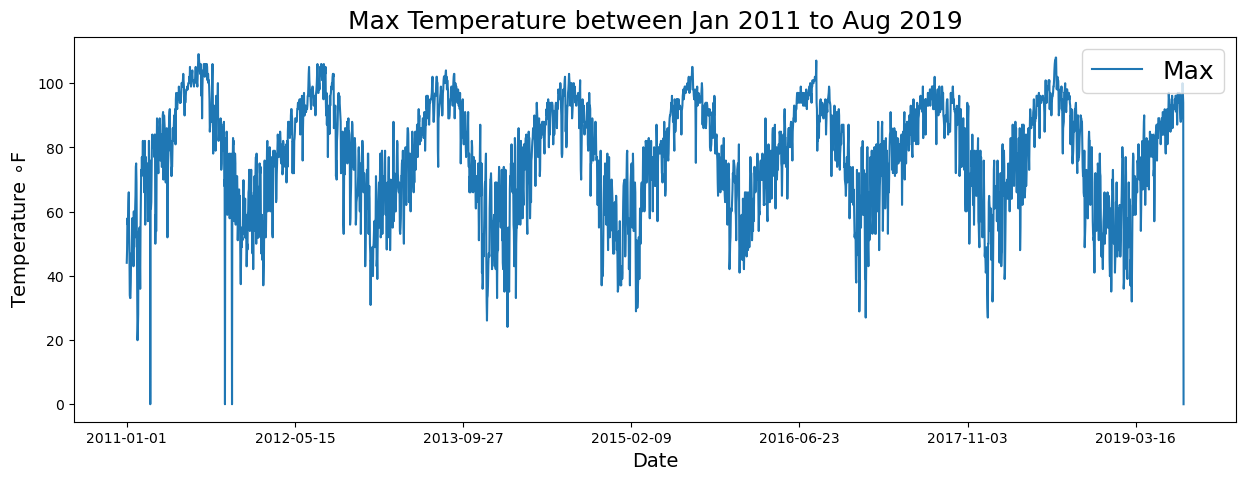

In [9]:
# visualization
fig, ax = plt.subplots(figsize=(15, 5))

labels = total_dataset['date'].values
data_label_pair = [('Max', total_label_data['OBS_tmpf_max'])]

for label,temp in data_label_pair:
  plt.plot(np.arange(len(labels)),temp,label=label)

ax.set_xticks(np.arange(len(labels))[::500]) 
ax.set_xticklabels(labels[::500])
plt.ylabel("Temperature $\circ$F",fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.legend(loc='upper right',fontsize=18)
plt.title('Max Temperature between Jan 2011 to Aug 2019', fontsize=18)

In [10]:
# However, the number of features is too big for our dataset. 
# For now, let's try with only 50 features from GFS model 
subsample_feature = total_feature_data.iloc[:,:51] #date + 50 features

# we only need maximum temperature from obs
subsample_label = total_label_data['OBS_tmpf_max'][:]

#### Randomly splitting the data

In [11]:
# randomly split 80% data for training set and 20% data for testing set
random_train_x, random_test_x, random_train_y, random_test_y = train_test_split(
    subsample_feature, 
    subsample_label, 
    train_size = 0.8
    )

random_train_x = random_train_x.drop(['date'], axis=1)
random_test_x = random_test_x.drop(['date'], axis=1)
print(f'Training data shape: {random_train_x.shape}')
print(f'Observation data shape: {random_train_y.shape}')
print(f'Testing data shape: {random_test_x.shape}')

Training data shape: (2514, 50)
Observation data shape: (2514,)
Testing data shape: (629, 50)


In [13]:
# see the ranges of features: GFS0_pmsl_max GFS0_sktc_max
# PMSL - Mean sea level pressure (hPa)
max1=random_train_x['GFS0_pmsl_max'].max(axis=0)
min1=random_train_x['GFS0_pmsl_max'].min(axis=0)
range1=max1-min1
print("Feature: GFS0_pmsl_max")
print("range: "+str(range1))
print("max: "+str(max1))
print("min: "+str(min1))

print("")

# SKTC - Skin temperature (C)
max2=random_train_x['GFS0_sktc_max'].max(axis=0)
min2=random_train_x['GFS0_sktc_max'].min(axis=0)
range2=max2-min2
print("Feature: GFS0_sktc_max")
print("range: "+str(range2))
print("max: "+str(max2))
print("min: "+str(min2))

Feature: GFS0_pmsl_max
range: 40.000000000000114
max: 1042.9
min: 1002.9

Feature: GFS0_sktc_max
range: 55.24
max: 53.64
min: -1.6


#### Scaling the data

In [14]:
def scale_data(train_x, test_x):
    """
    Scales training and testing data using MinMaxScaler.

    Parameters:
    train_x (array-like): Training data features.
    test_x (array-like): Testing data features.

    Returns:
    tuple: Scaled training and testing data.
    """

    # Fit/find minimum and maximum value for each input variable
    min_max_model = MinMaxScaler().fit(train_x)

    # This saves the values to apply or 'transform' testing data
    train_x_minmax = min_max_model.transform(train_x)
    #print('Training data range \nMax:', np.nanmax(train_x_minmax), ', Min:', np.nanmin(train_x_minmax))

    # Apply the min/max values to testing data
    test_x_minmax = min_max_model.transform(test_x)
    #print('\nTesting data range \nMax:', np.nanmax(test_x_minmax), ', Min:', np.nanmin(test_x_minmax))

    return train_x_minmax, test_x_minmax

In [15]:
scaled_random_train_x, scaled_random_test_x = scale_data(random_train_x, random_test_x)

In [16]:
# Train and evaluate the model to predict max temperature
linear_regression_model = LinearRegression()

#Train
linear_regression_model.fit(scaled_random_train_x, random_train_y.values)

# score on training set
train_y_pred = linear_regression_model.predict(scaled_random_train_x)
R2 = r_squared(random_train_y.values, train_y_pred)
MAE = mean_absolute_error(random_train_y.values, train_y_pred)
RMSE = root_mean_squared_error(random_train_y.values, train_y_pred)
print(f"Train Evaluation =========>  R^2 = {R2:.2f} | MAE = {MAE:.2f} | RMSE = {RMSE:.2f}")

# score on testing set
test_y_pred = linear_regression_model.predict(scaled_random_test_x)
R2_test = r_squared(random_test_y.values, test_y_pred)
MAE_test = mean_absolute_error(random_test_y.values, test_y_pred)
RMSE_test = root_mean_squared_error(random_test_y.values, test_y_pred)
print(f"Test Evaluation  =========>  R^2 = {R2_test:.2f} | MAE = {MAE_test:.2f} | RMSE = {RMSE_test:.2f}")

Train Evaluation =========>  R^2 = 0.93 | MAE = 3.20 | RMSE = 4.42
Test Evaluation  =========>  R^2 = 0.92 | MAE = 3.32 | RMSE = 4.96


#### Split by Time

In [17]:
def split_data_by_date(features, labels, date_ranges):
    """
    Splits a DataFrame into multiple DataFrames based on specified date ranges.

    Args:
    df (pd.DataFrame): The original DataFrame.
    time_col (str): The name of the column containing time data.
    date_ranges (list of tuples): A list of tuples where each tuple contains start and end dates as strings.
                                  Example: [('2009-01-01', '2012-12-31'), ('2013-01-01', '2017-12-31')]

    Returns:
    list: A list containing the split DataFrames.
    """

    features_list = pd.to_datetime(features['date'])
    date_mask = (features_list > date_ranges[0]) & (features_list <= date_ranges[1])
    out_data = features.loc[date_mask,:].drop(['date'], axis=1)
    out_labels = labels.loc[date_mask]

    return out_data, out_labels

In [18]:
date_ranges = [('2011-01-01','2017-12-31'), ('2018-01-01','2019-12-31')]
time_train_x, time_train_y = split_data_by_date(subsample_feature, subsample_label,  date_ranges[0])
time_test_x, time_test_y = split_data_by_date(subsample_feature, subsample_label, date_ranges[1])
print(f"train dataset samples: {time_train_x.shape} | test dataset samples: {time_test_x.shape}")

train dataset samples: (2558, 50) | test dataset samples: (583, 50)


In [19]:
scaled_time_train_x, scaled_time_test_x = scale_data(time_train_x, time_test_x)

In [20]:
# Train and evaluate the model to predict max temperature
linear_regression_model = LinearRegression()
#Train
linear_regression_model.fit(scaled_time_train_x, time_train_y.values)

# score on training set
train_y_pred = linear_regression_model.predict(scaled_time_train_x)
R2 = r_squared(time_train_y.values, train_y_pred)
MAE = mean_absolute_error(time_train_y.values, train_y_pred)
RMSE = root_mean_squared_error(time_train_y.values, train_y_pred)
print(f"Train Evaluation =========>  R^2 = {R2:.2f} | MAE = {MAE:.2f} | RMSE = {RMSE:.2f}")

# score on testing set
test_y_pred = linear_regression_model.predict(scaled_time_test_x)
R2_test = r_squared(time_test_y.values, test_y_pred)
MAE_test = mean_absolute_error(time_test_y.values, test_y_pred)
RMSE_test = root_mean_squared_error(time_test_y.values, test_y_pred)
print(f"Test Evaluation  =========>  R^2 = {R2_test:.2f} | MAE = {MAE_test:.2f} | RMSE = {RMSE_test:.2f}")

Train Evaluation =========>  R^2 = 0.93 | MAE = 3.18 | RMSE = 4.57
Test Evaluation  =========>  R^2 = 0.85 | MAE = 4.47 | RMSE = 6.65


#### Cross-Validation

In [21]:
# Train and evaluate the model to predict max temperature
linear_regression_model = LinearRegression()
# Store the results
results = []
years = [year for year in range(2011, 2020)]
for year in years:
    date_ranges = (f'{year}-01-01',f'{year}-12-31')
    cv_test_x, cv_test_y = split_data_by_date(subsample_feature, subsample_label, date_ranges)

    cv_train_x = subsample_feature[~subsample_feature.index.isin(cv_test_x.index)]
    cv_train_x = cv_train_x.drop(['date'], axis=1)
    cv_train_y = subsample_label[~subsample_label.index.isin(cv_test_y.index)]

    scaled_cv_train_x, scaled_cv_test_x = scale_data(cv_train_x, cv_test_x)

    #Train
    linear_regression_model.fit(scaled_cv_train_x, cv_train_y.values)
    cv_train_y_pred = linear_regression_model.predict(scaled_cv_train_x)
    R2 = r_squared(cv_train_y.values, cv_train_y_pred)
    MAE = mean_absolute_error(cv_train_y.values, cv_train_y_pred)
    RMSE = root_mean_squared_error(cv_train_y.values, cv_train_y_pred)
    print(f"{year} Holdout")
    print(f"Train Evaluation =========>  R^2 = {R2:.2f} | MAE = {MAE:.2f} | RMSE = {RMSE:.2f}")

    # score on testing set
    cv_test_y_pred = linear_regression_model.predict(scaled_cv_test_x)
    R2_test = r_squared(cv_test_y.values, cv_test_y_pred)
    MAE_test = mean_absolute_error(cv_test_y.values, cv_test_y_pred)
    RMSE_test = root_mean_squared_error(cv_test_y.values, cv_test_y_pred)
    print(f"Test Evaluation  =========>  R^2 = {R2_test:.2f} | MAE = {MAE_test:.2f} | RMSE = {RMSE_test:.2f}")

    print("==================================================================")


2011 Holdout
Train Evaluation =========>  R^2 = 0.94 | MAE = 3.12 | RMSE = 3.98
Test Evaluation  =========>  R^2 = 0.86 | MAE = 4.11 | RMSE = 7.55
2012 Holdout
Train Evaluation =========>  R^2 = 0.93 | MAE = 3.22 | RMSE = 4.59
Test Evaluation  =========>  R^2 = 0.93 | MAE = 3.45 | RMSE = 4.14
2013 Holdout
Train Evaluation =========>  R^2 = 0.93 | MAE = 3.27 | RMSE = 4.62
Test Evaluation  =========>  R^2 = 0.95 | MAE = 2.85 | RMSE = 3.83
2014 Holdout
Train Evaluation =========>  R^2 = 0.93 | MAE = 3.23 | RMSE = 4.59
Test Evaluation  =========>  R^2 = 0.94 | MAE = 3.14 | RMSE = 4.10
2015 Holdout
Train Evaluation =========>  R^2 = 0.93 | MAE = 3.15 | RMSE = 4.53
Test Evaluation  =========>  R^2 = 0.92 | MAE = 3.77 | RMSE = 4.74
2016 Holdout
Train Evaluation =========>  R^2 = 0.93 | MAE = 3.25 | RMSE = 4.62
Test Evaluation  =========>  R^2 = 0.94 | MAE = 3.09 | RMSE = 3.77
2017 Holdout
Train Evaluation =========>  R^2 = 0.93 | MAE = 3.23 | RMSE = 4.58
Test Evaluation  =========>  R^2 = 0.9

In [22]:
def scatter_plot(ytrue, ypred):

    R2 = r_squared(ytrue, ypred)
    MAE = mean_absolute_error(ytrue, ypred)
    RMSE = root_mean_squared_error(ytrue, ypred)
    g = sns.jointplot(x = ytrue, 
                        y = ypred,
                        height = 6, 
                        ratio = 3)

    g.ax_joint.plot([0, 110], [0, 110], '--r', linewidth=2)

    plt.xlabel('Measured (F)')
    plt.ylabel('Predicted (F)')
    plt.grid(False)

    scores = (r'R^2={:.2f}' + '\n' + r'MAE={:.2f}' + '\n' + r'RMSE={:.2f}').format(
        R2, MAE, RMSE)

    plt.text(1, 115.7, scores, bbox=dict(facecolor = 'white', edgecolor = 'gray', boxstyle = 'round, pad=0.2'),
            fontsize = 12, ha='left', va = 'top')

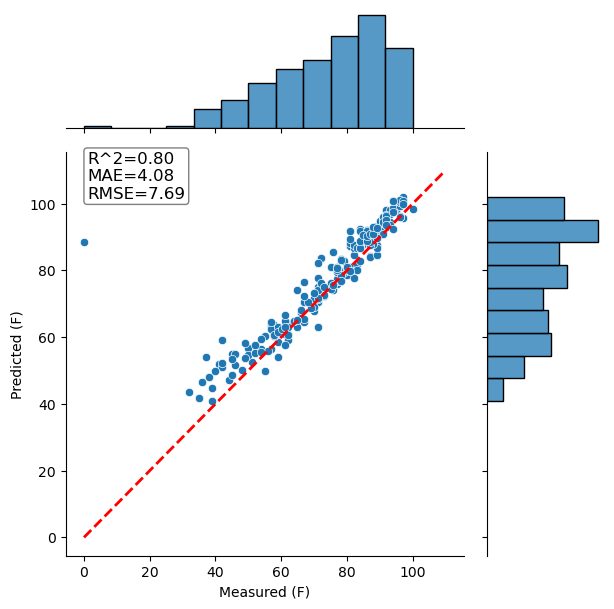

In [23]:
scatter_plot(cv_test_y.values, cv_test_y_pred)

### II. Classification

##### Binarization 

In [24]:
# Binarize the 'temperature' column
subsample_label_class = pd.DataFrame()
subsample_label_class['class'] = np.where(subsample_label > 100, 1, 0)
# Binarize the 'temperature' column and label classes
subsample_label_class['class_name'] = np.where(subsample_label > 100, 'Severe Days', 'Common Days')

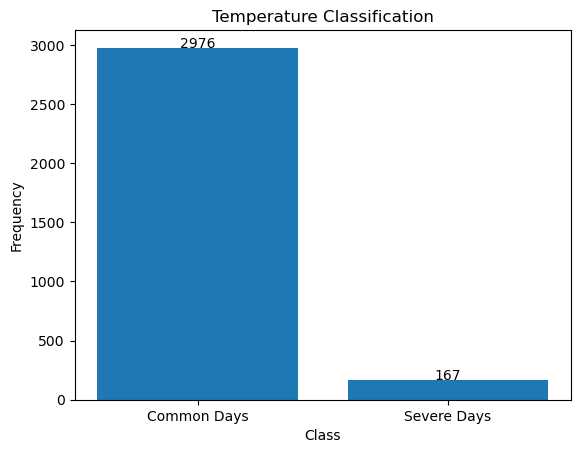

In [25]:
# Count the frequency of each class
class_counts = subsample_label_class['class_name'].value_counts()

# Plotting
plt.bar(class_counts.index, class_counts.values)
# Adding count labels on top of each bar
for index, value in enumerate(class_counts.values):
    plt.text(index, value, str(value), ha='center')
plt.title('Temperature Classification')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

##### Data Splitting 

In [29]:
subsample_feature_ = subsample_feature.drop(['date'], axis=1) 
cls_xtrain, cls_xtest, cls_ytrain, cls_ytest = model_selection.train_test_split(subsample_feature_, 
                                                                 subsample_label_class['class'].values, 
                                                                 test_size=0.2, 
                                                                 random_state=4) 

In [30]:
scaled_cls_xtrain, scaled_cls_xtest = scale_data(cls_xtrain, cls_xtest)

##### Random Forest Classifier

In [31]:
rf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)

Accuracy = 0.97 | Precision: 0.75 | Recall = 0.50 | F1_score = 0.60
POD = 0.50 | F: 0.01 | FAR = 0.25 | CSI = 0.43 | HSS = 0.59 | PSS = 0.49


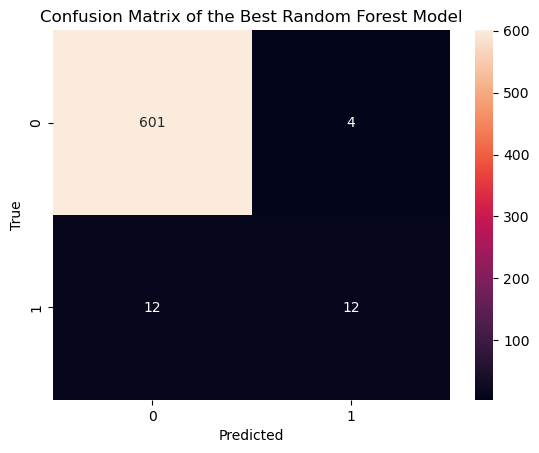

In [32]:
rf.fit(scaled_cls_xtrain, cls_ytrain)

# Make predictions on the test set
cls_y_pred = rf.predict(scaled_cls_xtest)

# Compute the confusion matrix
conf_matrix = confusion_matrix(cls_ytest, cls_y_pred)

results = evaluate_binary_classification(cls_ytest, cls_y_pred)
print(f"Accuracy = {results['accuracy']:.2f} | Precision: {results['precision']:.2f} | Recall = {results['recall']:.2f} | F1_score = {results['f1_score']:.2f}")

skr = evaluation_skill_metrics(cls_ytest, cls_y_pred)
print(f"POD = {skr['POD']:.2f} | F: {skr['F']:.2f} | FAR = {skr['FAR']:.2f} | CSI = {skr['CSI']:.2f} | HSS = {skr['HSS']:.2f} | PSS = {skr['PSS']:.2f}")

sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Best Random Forest Model')
plt.show()

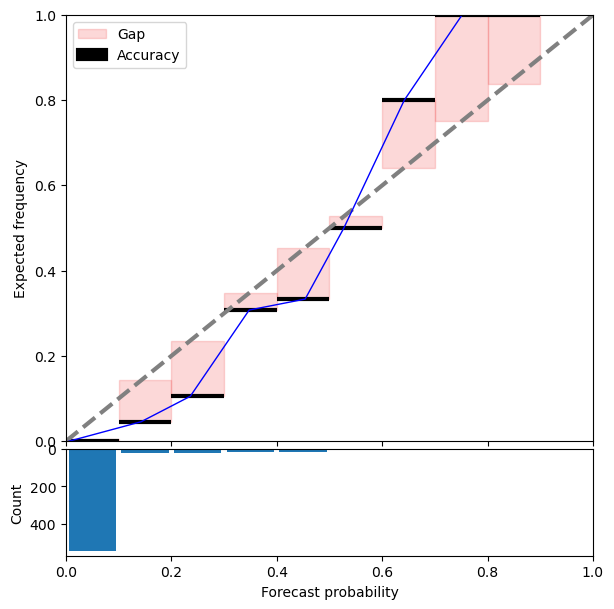

In [33]:
cls_ytest_probs = rf.predict_proba(scaled_cls_xtest)[:, 1]
reliability_diagram(cls_ytest, cls_ytest_probs)

#### Learning Curve
<figure>
    <p align="center">
        <img src="https://zahidhasan.github.io/images/learning_curve2.png" alt="Alt text for the image" width="800px" />
    </p>
</figure>

<figure>
    <p align="center">
        <img src="https://zahidhasan.github.io/images/learning_curve3.png" alt="Alt text for the image" width="800px" />
</figure>
Fixing High Bias: <br>
- When training and testing errors converge and are high
- No matter how much data we feed the model, the model cannot represent the underlying relationship and has high systematic error
- Poor fit
- Poor generalization

SOLUTIONS: 

- find more features
- add polynomial features
- increase parameters (more hidden layer neurons, for example)
- decrease regularization


<figure>
    <p align="center">
        <img src="https://zahidhasan.github.io/images/learning_curve4.png" alt="Alt text for the image" width="800px" />
        <figcaption> Bias-Variance Trade-off. Figure Credit: <a href="https://zahidhasan.github.io/2020/10/13/bias-variance-trade-off-and-learning-curve.html">Link</a></figcaption>
    </p>
</figure>
Fixing High Variance:  <br>
- When there is a large gap between the errors
- Require data to improve
- Can simplify the model with fewer or less complex features
SOLUTIONS: 
- more training data
- reduce number of features, manually or using a model selection algorithm
- increase regularization

<figure>
    <p align="center">
        <img src="https://zahidhasan.github.io/images/bias_variance7.png" alt="Alt text for the image" width="800px" />
        <figcaption> Bias-Variance Trade-off. Figure Credit: <a href="https://zahidhasan.github.io/2020/10/13/bias-variance-trade-off-and-learning-curve.html">Link</a></figcaption>
    </p>
</figure>

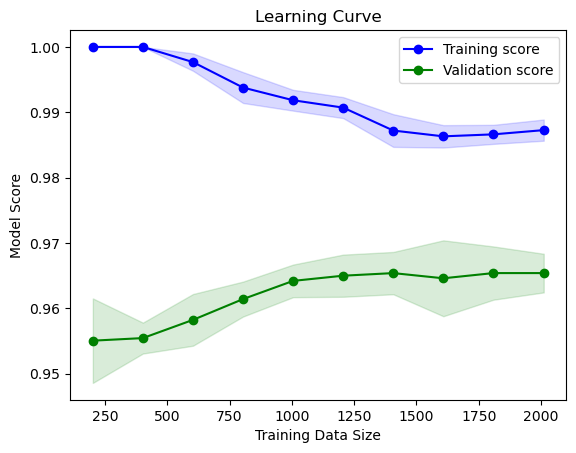

In [34]:
from sklearn.model_selection import learning_curve

# Compute the learning curve
train_sizes, train_scores, val_scores = learning_curve(rf, scaled_cls_xtrain, cls_ytrain, cv=5, n_jobs=-1, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, val_mean, label='Validation score', color='green', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.15)

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.legend(loc='best')
plt.show()

### III. Imbalance Learning

In [35]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Over-Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(scaled_cls_xtrain, cls_ytrain)

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(scaled_cls_xtrain, cls_ytrain)

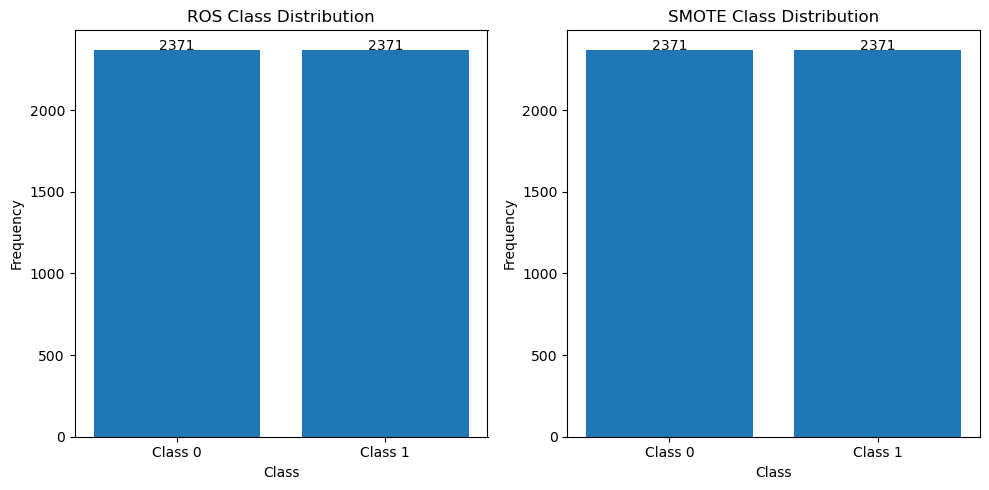

In [36]:
# Count the frequency of each class
class_counts_ros = np.array([np.count_nonzero(y_ros == 0), np.count_nonzero(y_ros == 1)])
class_counts_smote = np.array([np.count_nonzero(y_smote == 0), np.count_nonzero(y_smote == 1)])

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plotting for Random Over-Sampling data
axes[0].bar(['Class 0', 'Class 1'], class_counts_ros)
axes[0].set_title('ROS Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
# Adding text labels on top of each bar
for index, value in enumerate(class_counts_ros):
    axes[0].text(index, value, str(value), ha='center')

# Plotting for SMOTE data
axes[1].bar(['Class 0', 'Class 1'], class_counts_smote)
axes[1].set_title('SMOTE Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')
# Adding text labels on top of each bar
for index, value in enumerate(class_counts_smote):
    axes[1].text(index, value, str(value), ha='center')

# Display the plots
plt.tight_layout()
plt.show()

In [37]:
rf_ros = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)
rf_ros.fit(X_ros, y_ros)

rf_smote = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)

Accuracy = 0.92 | Precision: 0.32 | Recall = 0.96 | F1_score = 0.48
 POD = 0.96 | F: 0.08 | FAR = 0.68 | CSI = 0.32 | HSS = 0.45 | PSS = 0.88


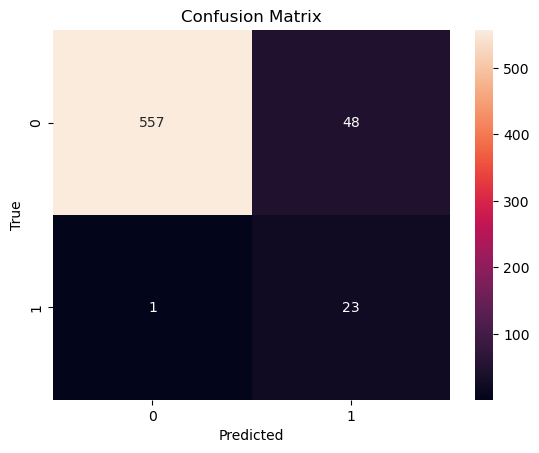

Accuracy = 0.93 | Precision: 0.34 | Recall = 1.00 | F1_score = 0.51
 POD = 1.00 | F: 0.08 | FAR = 0.66 | CSI = 0.34 | HSS = 0.48 | PSS = 0.92


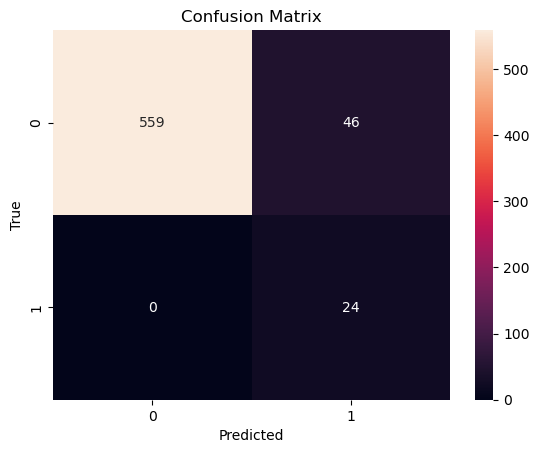

In [38]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results = evaluate_binary_classification(y_test, y_pred)
    print(f"Accuracy = {results['accuracy']:.2f} | Precision: {results['precision']:.2f} | Recall = {results['recall']:.2f} | F1_score = {results['f1_score']:.2f}")

    skr = evaluation_skill_metrics(y_test, y_pred)
    print(f" POD = {skr['POD']:.2f} | F: {skr['F']:.2f} | FAR = {skr['FAR']:.2f} | CSI = {skr['CSI']:.2f} | HSS = {skr['HSS']:.2f} | PSS = {skr['PSS']:.2f}")
    sns.heatmap(conf_matrix, annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# For Over-Sampled data
plot_confusion_matrix(rf_ros, scaled_cls_xtest, cls_ytest)

# For SMOTE data
plot_confusion_matrix(rf_smote, scaled_cls_xtest, cls_ytest)

#### 
<figure>
    <p align="center">
        <img src="https://files.oaiusercontent.com/file-3yzQp4CtW2ZC2gI1BWPWUYi0?se=2024-01-26T14%3A47%3A51Z&sp=r&sv=2021-08-06&sr=b&rscc=max-age%3D31536000%2C%20immutable&rscd=attachment%3B%20filename%3De8d408f1-18ca-4dd6-89ab-d3659dca0187.webp&sig=atbM8qwxb5bhRzzx76FWtF1eGFqFAVgwkY31QQ2/h30%3D" alt="Alt text for the image" width="500px" />
    </p>
</figure>



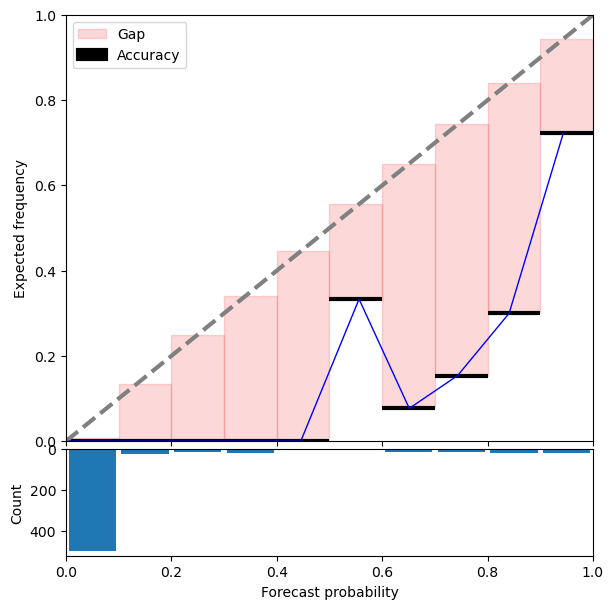

In [39]:
y_test_probs_smote = rf_smote.predict_proba(scaled_cls_xtest)[:, 1]
reliability_diagram(cls_ytest, y_test_probs_smote)

### IV. Hyper-parameter Tunning and Model Selection

There are several solution: 
- Manual search
- Grid search
- Tools: 
    - Scikit-Optimize
    - Keras-Tunner
    - Optuna
    - Hyperopt
    - Ray.tune
    - Talos 
    - BaysianOptimization

In [40]:
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 100)
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    return np.mean(cross_val_score(clf, scaled_cls_xtrain, cls_ytrain, cv=3, n_jobs=-1))

def objective_mlp(trial):
    hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(50,), (100,), (50, 50), (100, 50)])
    learning_rate_init = trial.suggest_float("learning_rate_init", 1e-4, 1e-2, log=True)

    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, random_state=42)
    return np.mean(cross_val_score(clf, scaled_cls_xtrain, cls_ytrain, cv=3, n_jobs=-1))

def objective_lr(trial):
    C = trial.suggest_float("C", 1e-4, 1e4, log=True)

    clf = LogisticRegression(C=C, random_state=42)
    return np.mean(cross_val_score(clf, scaled_cls_xtrain, cls_ytrain, cv=3, n_jobs=-1))


In [41]:
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=100)

study_mlp = optuna.create_study(direction="maximize")
study_mlp.optimize(objective_mlp, n_trials=100)

study_lr = optuna.create_study(direction="maximize")
study_lr.optimize(objective_lr, n_trials=100)

[I 2024-01-26 09:40:26,257] A new study created in memory with name: no-name-4869aa82-c51f-40c3-9127-d3220bbddba8
[I 2024-01-26 09:40:26,518] Trial 0 finished with value: 0.9681782020684168 and parameters: {'n_estimators': 49, 'max_depth': 16}. Best is trial 0 with value: 0.9681782020684168.
[I 2024-01-26 09:40:26,783] Trial 1 finished with value: 0.9665871121718377 and parameters: {'n_estimators': 75, 'max_depth': 12}. Best is trial 0 with value: 0.9681782020684168.
[I 2024-01-26 09:40:27,000] Trial 2 finished with value: 0.968178202068417 and parameters: {'n_estimators': 89, 'max_depth': 10}. Best is trial 2 with value: 0.968178202068417.
[I 2024-01-26 09:40:27,099] Trial 3 finished with value: 0.9649960222752586 and parameters: {'n_estimators': 22, 'max_depth': 11}. Best is trial 2 with value: 0.968178202068417.
[I 2024-01-26 09:40:27,425] Trial 4 finished with value: 0.9665871121718377 and parameters: {'n_estimators': 92, 'max_depth': 28}. Best is trial 2 with value: 0.968178202068

In [42]:
print("Best Random Forest Model: ", study_rf.best_params)
print("Best MLP Model: ", study_mlp.best_params)
print("Best Logistic Regression Model: ", study_lr.best_params)

Best Random Forest Model:  {'n_estimators': 47, 'max_depth': 9}
Best MLP Model:  {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.0008271961894392654}
Best Logistic Regression Model:  {'C': 1728.1356460265151}


Accuracy = 0.98 | Precision: 0.78 | Recall = 0.58 | F1_score = 0.67
POD = 0.58 | F: 0.01 | FAR = 0.22 | CSI = 0.50 | HSS = 0.66 | PSS = 0.58


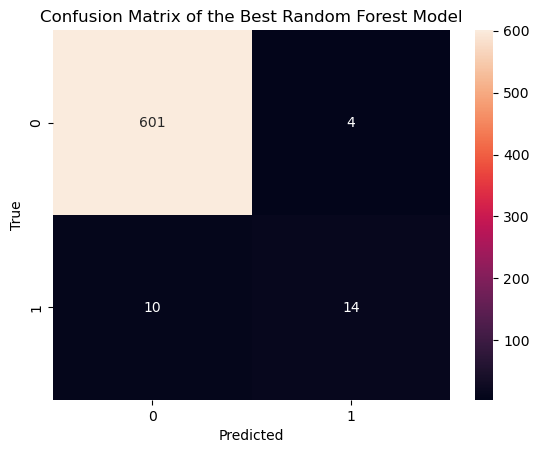

In [44]:
# Example: Evaluate the best Random Forest model
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params, random_state=42).fit(scaled_cls_xtrain, cls_ytrain)

# Make predictions on the test set
y_pred_tune = best_rf.predict(scaled_cls_xtest)

# Compute the confusion matrix
conf_matrix = confusion_matrix(cls_ytest, y_pred_tune)

results = evaluate_binary_classification(cls_ytest, y_pred_tune)
print(f"Accuracy = {results['accuracy']:.2f} | Precision: {results['precision']:.2f} | Recall = {results['recall']:.2f} | F1_score = {results['f1_score']:.2f}")

skr = evaluation_skill_metrics(cls_ytest, y_pred_tune)
print(f"POD = {skr['POD']:.2f} | F: {skr['F']:.2f} | FAR = {skr['FAR']:.2f} | CSI = {skr['CSI']:.2f} | HSS = {skr['HSS']:.2f} | PSS = {skr['PSS']:.2f}")

sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Best Random Forest Model')
plt.show()

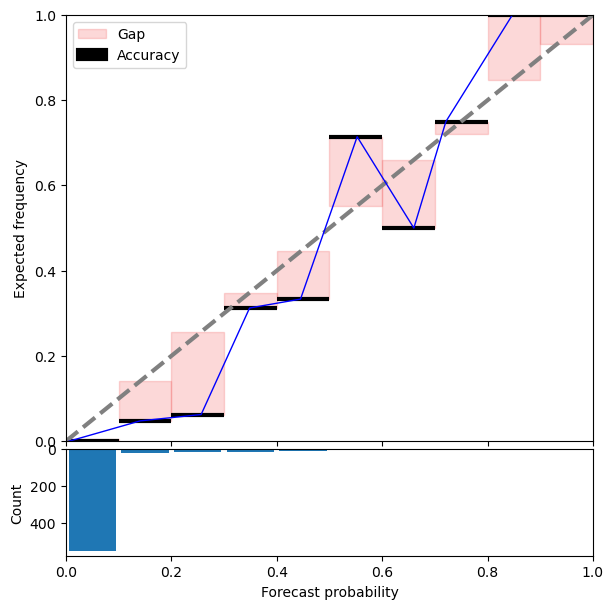

In [45]:
y_test_probs_tune = best_rf.predict_proba(scaled_cls_xtest)[:, 1]
reliability_diagram(cls_ytest, y_test_probs_tune)